# Исследование рынка компьютерных игр

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков»

Цель: 
- проработать алгоритм подготовки данных для выявления потенциально популярного продукта и прогноза рекламных кампаний следующего года

## Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


## Содержание <a id="cont"></a>

1. [Просмотр данных](#step1)

2. [Обработка данных](#step2)

    2.1 [Изменение типов данных](#step21)
    
    2.2 [Обработка пропусков](#step22)
    
    2.3 [Обработка аномалий](#step23) 
    
3. [Исследовательский анализ данных](#step3)

    3.1 [Построим график, сколько игр выпускалось в разные годы](#step31)
    
    3.2 [Охарактеризуем данные продаж по платформам](#step32)
    
    3.3 [Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ](#step33)
    
    3.4 [График «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.](#step34)
    
    3.5 [Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?](#step35)
    
    3.6 [ Распределение игр по жанрам.](#step36)
    
    
4. [Портрет пользователя каждого региона](#step4)


5. [Проверка гипотез](#step5)

    5.1 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#step51)
    
    5.2 [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен игры) и Sports (англ. «спортивные соревнования»)](#step52)
    

6. [Выводы](#step6)

# 1. Просмотр данных
<a id="step1"></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st


try: 
    data = pd.read_csv('games.csv')
except: 
    data = pd.read_csv('/datasets/games.csv')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Найдем колическтво пропусков

In [4]:
display(pd.DataFrame(data.isna().sum()))
display(pd.DataFrame(round((data.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


,"NaNs, %"
Name,0.01
Platform,0.00
Year_of_Release,1.61
Genre,0.01
NA_sales,0.00
EU_sales,0.00
JP_sales,0.00
Other_sales,0.00
Critic_Score,51.32
User_Score,40.09


**Вывод**

- В каждой строке таблицы - данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
- Необходимо привести к нижнему регистру названия столбцов
- изменим типы данных:
    - year_of_realise - int
    - Critic_Score - int
    - User_Score - float64


# 2. Обработка данных
<a id="step2"></a>
### 2.1 Изменение типов данных
<a id="step21"></a>

In [5]:
data.rename(columns = {'Name': 'name', 'Platform': 'platform', 
                       'Year_of_Release':'relise_year',
                       'Genre': 'genre', 'NA_sales': 'na_sales',
                       'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                       'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 
                       'User_Score': 'user_score', 'Rating': 'rating'}, 
            inplace=True)

In [6]:
data.head()

,name,platform,relise_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data['relise_year'] = data['relise_year'].astype('int', errors='ignore')
data['critic_score'] = data['critic_score'].astype('int', errors='ignore')
data['user_score'] = data['user_score'].astype('float64', errors='ignore')
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

# Удалим дубликаты
data.drop_duplicates().reset_index(drop=True, inplace=True)

### 2.2 Обработка пропусков
<a id="step22"></a>

In [8]:
display(pd.DataFrame(data.isna().sum()))
display(pd.DataFrame(round((data.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,0
name,2
platform,0
relise_year,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


,"NaNs, %"
name,0.01
platform,0.00
relise_year,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


In [9]:
#data = data.loc[data['name'].isna()].drop() # nan в name и genre совпадают и составляют 0.01% от общего количества данных
# Пропуски в name и genre удалим
data = data.dropna(subset=['name']).reset_index(drop=True)
# Пропуски в relise_year удалим - они составляют 1.61% от общего количества данных
data = data.dropna(subset=['relise_year']).reset_index(drop=True)

Пропуски в столбцах critic_score, user_score и rating удалить или заменить средним нельзя - может привести к искажению данных.

Пропуски в critic score могут быть вызваны тем, что не для каждой игры требуется оценка (например, есть какой-нибудь пороговый уровень скачиваний/оценок пользователей, после которого необходима оценка эксперта). Заменим Nan индекаторным значением -1.

User_score - возможно какое-то время не было платформ для сбора информации. Заменим Nan индекаторным значением -1. 

Пропуски в rating могут быть связаны с тем, что организация ESRB была основана в 1994 году, и оценки к играм стали ставить позже. Заменим Nan индекаторным значением -1. 

In [10]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna(-1)

### 2.3 Обработка аномалий
<a id="step23"></a>

In [11]:
for columns in data.columns:
    print('Уникальные значения столбца '+columns)
    print(data[columns].unique())
    print()

Уникальные значения столбца name
['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']

Уникальные значения столбца platform
['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']

Уникальные значения столбца relise_year
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.]

Уникальные значения столбца genre
['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']

Уникальные значения столбца na_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 

В столбце user_score есть значение 'tbd' - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим значение на nan.

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float64', errors='ignore')

Разберемся со значением столбца rating: значения "K-A" kids to adults - использовались до 98 года, затем для определения той же аудитории стали использовать значение "E" for everyone - для детей с 6 лет. Оставим это значение, так как анализируем период позже 1998 года.

«RP» («Rating Pending») — «Рейтинг ожидается» - оставим это значение. 

In [13]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

# 3. Исследовательский анализ данных
<a id="step3"></a>

- сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
- За какой характерный срок появляются новые и исчезают старые платформы? Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

#### 1. Построим график, сколько  игр выпускалось в разные годы
<a id="step31"></a>

In [14]:
data.pivot_table(index='relise_year', values='total_sales', aggfunc='count').rename(columns={'total_sales':'games_relised'})

,games_relised
relise_year,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


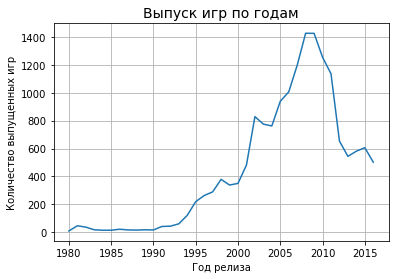

In [15]:
data.pivot_table(index='relise_year', values='total_sales', aggfunc='count').plot(grid=True, legend=False)
plt.title('Выпуск игр по годам', fontsize=14)
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.show()

**Вывод**

Данные по выпущенным по годам играм не важны:
В 1980-х только появились ПК, вплоть до 90х годов был небольшой спрос на компьютеры. В 2000-х стал доступен мобильный широкополостный доступ - произошел рост релиза игр до 2009 года. Далее период 2009-2016 года характеризуется спадом.

#### 2. Охарактеризуем данные продаж по платформам:
<a id="step31"></a>

Найдем платформы с наибольшими суммарными продажами и постройте распределение по годам.

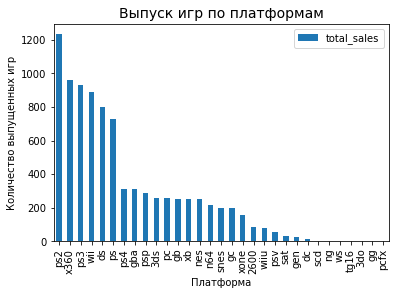

In [16]:
platforms_sorted = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms_sorted.plot(kind='bar')
plt.title('Выпуск игр по платформам', fontsize=14)
plt.xlabel('Платформа')
plt.ylabel('Количество выпущенных игр')
plt.show()


**Вывод:**

По количеству продаж за все время выделяется 6 платформ:

- ps2 - наибольшее количество выпущенных игр 
- x360
- ps3	
- wii	
- ds	
- ps	

Выделим топ 15 платформ и рассмотрим, как продажи меняются со временем:

Платформа ps2


,total_sales
relise_year,
2000.0,39.17
2001.0,166.43
2002.0,205.38
2003.0,184.31
2004.0,211.81
2005.0,160.66
2006.0,103.42
2007.0,75.99
2008.0,53.90


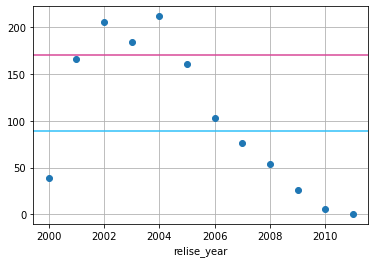

Платформа x360


,total_sales
relise_year,
2005.0,8.25
2006.0,51.62
2007.0,95.41
2008.0,135.26
2009.0,120.29
2010.0,170.03
2011.0,143.84
2012.0,99.74
2013.0,88.58


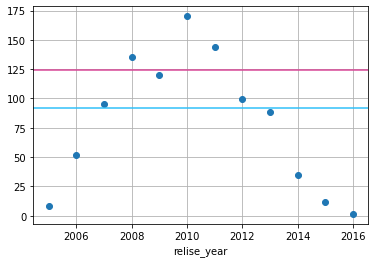

Платформа ps3


,total_sales
relise_year,
2006.0,20.96
2007.0,73.19
2008.0,118.52
2009.0,130.93
2010.0,142.17
2011.0,156.78
2012.0,107.36
2013.0,113.25
2014.0,47.76


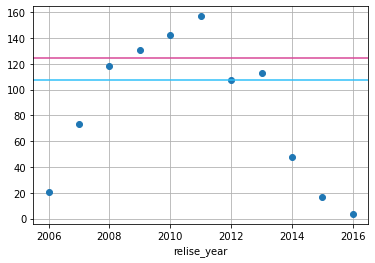

Платформа wii


,total_sales
relise_year,
2006.0,137.15
2007.0,152.77
2008.0,171.32
2009.0,206.97
2010.0,127.95
2011.0,59.65
2012.0,21.71
2013.0,8.59
2014.0,3.75


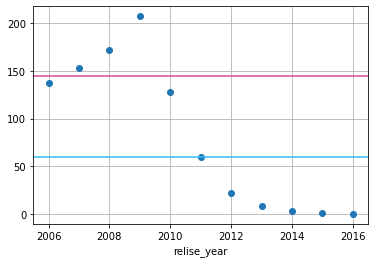

Платформа ds


,total_sales
relise_year,
1985.0,0.02
2004.0,17.27
2005.0,130.14
2006.0,119.81
2007.0,146.94
2008.0,145.31
2009.0,119.54
2010.0,85.02
2011.0,26.18


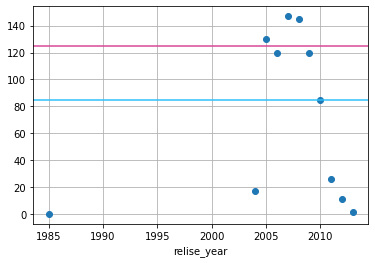

Платформа ps


,total_sales
relise_year,
1994.0,6.03
1995.0,35.96
1996.0,94.70
1997.0,136.17
1998.0,169.49
1999.0,144.53
2000.0,96.37
2001.0,35.59
2002.0,6.67


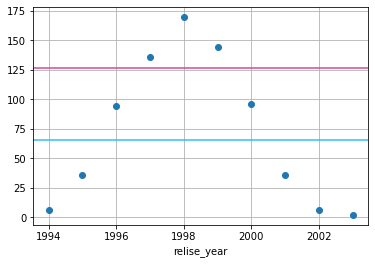

Платформа ps4


,total_sales
relise_year,
2013.0,25.99
2014.0,100.00
2015.0,118.90
2016.0,69.25


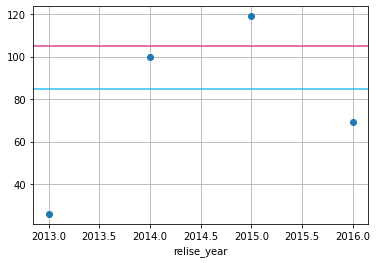

Платформа gba


,total_sales
relise_year,
2000.0,0.07
2001.0,61.53
2002.0,74.16
2003.0,56.67
2004.0,77.91
2005.0,33.86
2006.0,5.28
2007.0,3.40


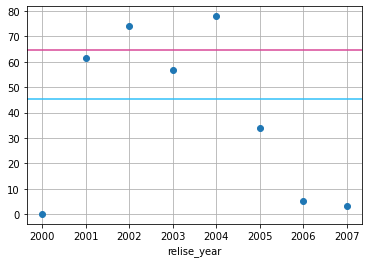

Платформа psp


,total_sales
relise_year,
2004.0,7.06
2005.0,43.84
2006.0,55.32
2007.0,46.93
2008.0,34.55
2009.0,37.78
2010.0,35.04
2011.0,17.82
2012.0,7.69


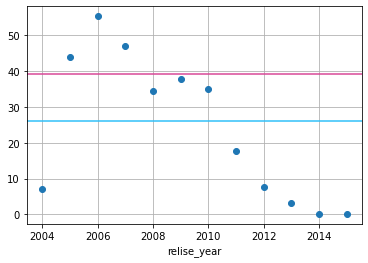

Платформа 3ds


,total_sales
relise_year,
2011.0,63.20
2012.0,51.36
2013.0,56.57
2014.0,43.76
2015.0,27.78
2016.0,15.14


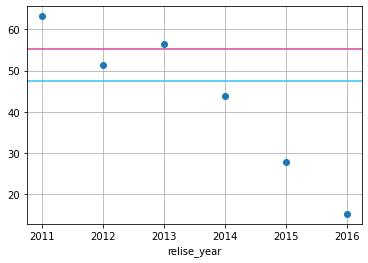

Платформа pc


,total_sales
relise_year,
1985.0,0.04
1988.0,0.03
1992.0,3.03
1994.0,12.87
1995.0,4.22
1996.0,10.58
1997.0,11.27
1998.0,3.26
1999.0,4.74


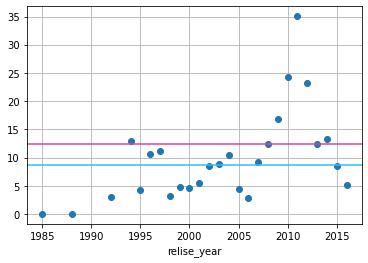

Платформа gb


,total_sales
relise_year,
1988.0,1.43
1989.0,64.97
1990.0,4.89
1991.0,5.57
1992.0,25.49
1994.0,12.18
1995.0,3.60
1996.0,36.03
1997.0,6.37


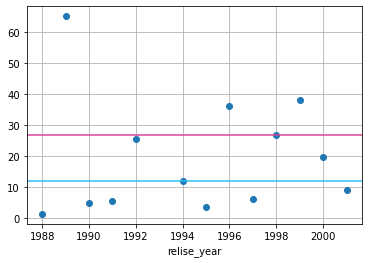

Платформа xb


,total_sales
relise_year,
2000.0,0.99
2001.0,22.26
2002.0,48.01
2003.0,55.04
2004.0,65.42
2005.0,49.08
2006.0,10.04
2007.0,0.55
2008.0,0.18


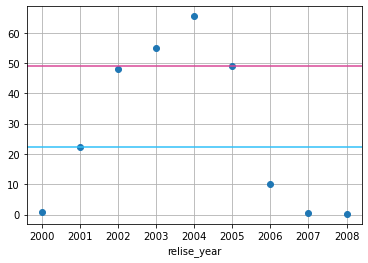

Платформа nes


,total_sales
relise_year,
1983.0,10.96
1984.0,50.08
1985.0,53.44
1986.0,36.41
1987.0,19.76
1988.0,45.01
1989.0,7.85
1990.0,15.73
1991.0,6.11


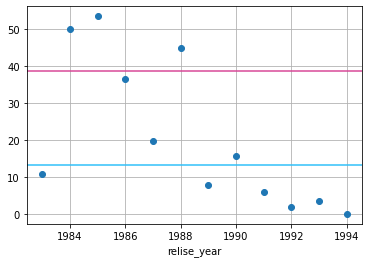

Платформа n64


,total_sales
relise_year,
1996.0,34.10
1997.0,39.50
1998.0,49.24
1999.0,57.87
2000.0,33.97
2001.0,3.25
2002.0,0.08


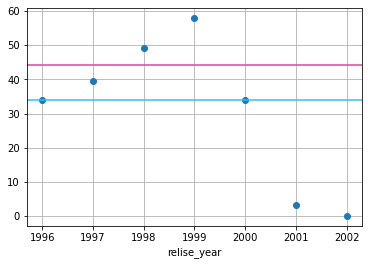

In [17]:
top_platforms = platforms_sorted.head(15).index
years = 0
df = pd.DataFrame({'relise_year': data.pivot_table(index='relise_year').index})
df = df.set_index('relise_year')
for platform in top_platforms:
    print('Платформа', platform)
    top_platforms_sorted = data.query('platform == @platform').pivot_table(index='relise_year', values='total_sales', aggfunc='sum')
    display(top_platforms_sorted)
    years += len(top_platforms_sorted.index)
    df = df.join(top_platforms_sorted, rsuffix = platform)
    df = df.rename(columns = {'total_sales'+platform: platform})
    top_platforms_sorted.plot(grid=True, legend=False, style='o')
    plt.axhline(top_platforms_sorted['total_sales'].median(),linestyle = '-', color = '#2EC0F9', label = 'median')
    plt.axhline(top_platforms_sorted['total_sales'].quantile(0.75),linestyle = '-', color = '#D84797', label = 'median')
    plt.show()


In [18]:
df = df.rename(columns = {'total_sales': 'ps2'}) #не переименовалось в  цикле
display(df.dropna(axis=0, thresh=1).fillna(0).style.background_gradient('GnBu'))
df = df.dropna(axis=0, thresh=1)

,ps2,x360,ps3,wii,ds,ps,ps4,gba,psp,3ds,pc,gb,xb,nes,n64
relise_year,,,,,,,,,,,,,,,
1983.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.960000,0.000000
1984.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.080000,0.000000
1985.0,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,53.440000,0.000000
1986.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.410000,0.000000
1987.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.760000,0.000000
1988.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,1.430000,0.000000,45.010000,0.000000
1989.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.970000,0.000000,7.850000,0.000000
1990.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.890000,0.000000,15.730000,0.000000
1991.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.570000,0.000000,6.110000,0.000000


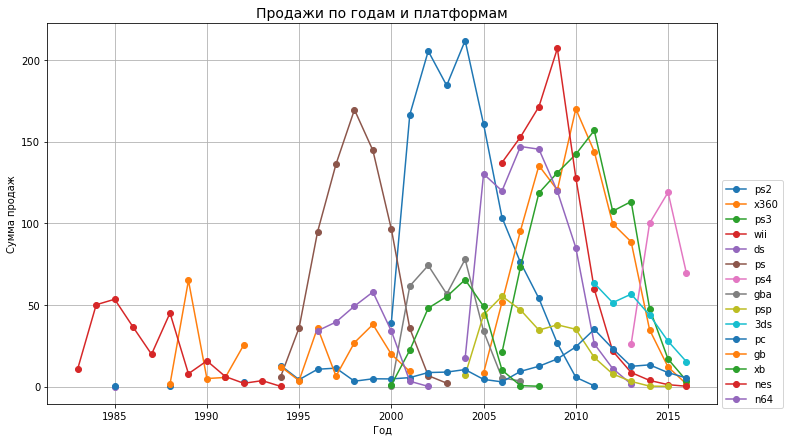

In [19]:
df.plot(figsize=(12, 7), style = '-o', grid = True)
plt.title('Продажи по годам и платформам', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()


In [20]:
print('Период жизни платформы ', round(years/15, 2))

Период жизни платформы  10.93


**Вывод**

Топ продаж игр на разных платформах длится в среднем 3-6 лет, после наблюдается спад. Самая продаваемая платформа - ps2, пик продаж пришелся на 2001-2006 года. На втором месте - x360 (2007-2012), третьем - ps3 (2008-2013). Отметим, что ps4 вышел в 2014 году, значит пик продаж игр на эту платформу, скорее всего, придется на 2017-2019 года. Конкурирующей площадкой станут площадки того же поколения - выпущенные в 2012-2014 годах. 

У компании Sony прослеживается смена поколений приставок, которые остаются на высоком уровне по прибыли продаж игр. Можно заметить, что с каждым новым поколением приставок продажи игр повышаются.

Характерный период жизни платформы примерно 10 лет. Однако согласно графику за период 2010-2016, наблюдается спад выручки от реализаци игр на всех платформах.

Наиболее распространенными методами экстраполяции трендов являются метод скользящего среднего: следующий во времени показатель по своей величине равен средней, рассчитанной за три периода. Актуальный период для расчета прогноза на 2017 год можно считать 2014-2016 года, но стоит также учесть разные поколения платформ, поэтому за анализируемый период возьмем данные за 2011-2016 года (8 поколение приставок).

Создадим актуальную базу:

In [21]:
min_relise_year = 2011
good_data = data.query('relise_year >= @min_relise_year')
good_data.head()

,name,platform,relise_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,call of duty: modern warfare 3,x360,2011.0,shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60


#### 3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ
<a id="step33"></a>

In [22]:
good_data['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'wii', 'ds', 'xone', 'wiiu', 'pc',
       'psv', 'psp', 'ps2'], dtype=object)

In [23]:
top_platforms = good_data['platform'].unique()
df1 = pd.DataFrame({'relise_year': good_data.pivot_table(index='relise_year').index})
df1 = df1.set_index('relise_year')
for platform in top_platforms:
    top_platforms_sorted = good_data.query('platform == @platform').pivot_table(index='relise_year', values='total_sales', aggfunc='sum')
    df1 = df1.join(top_platforms_sorted, rsuffix = platform)
    df1 = df1.rename(columns = {'total_sales'+platform: platform})
    
df1 = df1.rename(columns = {'total_sales': 'ps3'}) #не переименовалось в  цикле
display(df1.dropna(axis=0, thresh=1).fillna(0).style.background_gradient('GnBu'))
df1 = df1.dropna(axis=0, thresh=1)

,ps3,x360,ps4,3ds,wii,ds,xone,wiiu,pc,psv,psp,ps2
relise_year,,,,,,,,,,,,
2011.0,156.780000,143.840000,0.000000,63.200000,59.650000,26.180000,0.000000,0.000000,35.030000,4.630000,17.820000,0.450000
2012.0,107.360000,99.740000,0.000000,51.360000,21.710000,11.010000,0.000000,17.560000,23.220000,16.190000,7.690000,0.000000
2013.0,113.250000,88.580000,25.990000,56.570000,8.590000,1.540000,18.960000,21.650000,12.380000,10.590000,3.140000,0.000000
2014.0,47.760000,34.740000,100.000000,43.760000,3.750000,0.000000,54.070000,22.030000,13.280000,11.900000,0.240000,0.000000
2015.0,16.820000,11.960000,118.900000,27.780000,1.140000,0.000000,60.140000,16.350000,8.520000,6.250000,0.120000,0.000000
2016.0,3.600000,1.520000,69.250000,15.140000,0.180000,0.000000,26.150000,4.600000,5.250000,4.250000,0.000000,0.000000


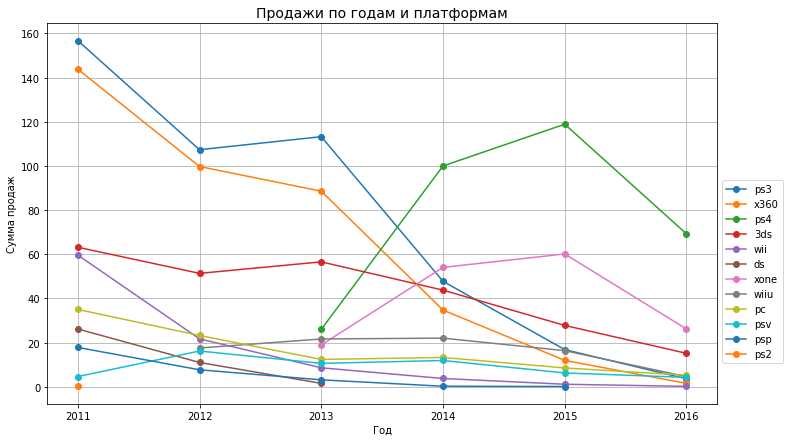

In [24]:
df1.plot(figsize=(12, 7), style = '-o', grid = True)
plt.title('Продажи по годам и платформам', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

In [26]:
good_data.pivot_table(index=['platform','relise_year'], values='total_sales', aggfunc='sum')

total_sales
platform relise_year             
3ds      2011.0             63.20
         2012.0             51.36
         2013.0             56.57
         2014.0             43.76
         2015.0             27.78
         2016.0             15.14
ds       2011.0             26.18
         2012.0             11.01
         2013.0              1.54
pc       2011.0             35.03
         2012.0             23.22
         2013.0             12.38
         2014.0             13.28
         2015.0              8.52
         2016.0              5.25
ps2      2011.0              0.45
ps3      2011.0            156.78
         2012.0            107.36
         2013.0            113.25
         2014.0             47.76
         2015.0             16.82
         2016.0              3.60
ps4      2013.0             25.99
         2014.0            100.00
         2015.0            118.90
         2016.0             69.25
psp      2011.0             17.82
         2012.0              7.69
         2013.0              3.14
         2014.0              0.24
         2015.0              0.12
psv      2011.0              4.63
         2012.0             16.19
         2013.0             10.59
         2014.0             11.90
         2015.0              6.25
         2016.0              4.25
wii      2011.0             59.65
         2012.0             21.71
         2013.0              8.59
         2014.0              3.75
         2015.0              1.14
         2016.0              0.18
wiiu     2012.0             17.56
         2013.0             21.65
         2014.0             22.03
         2015.0             16.35
         2016.0              4.60
x360     2011.0            143.84
         2012.0             99.74
         2013.0             88.58
         2014.0             34.74
         2015.0             11.96
         2016.0              1.52
xone     2013.0             18.96
         2014.0             54.07
         2015.0             60.14
         2016.0             26.15

**Вывод**

Рост продаж 2013-2015 наблюдается у приставок ps4, xone. Думаю, продажи на данных платформах еще не достигли своего пика. Снижение продаж в 2011-2016 характерно для 3ds, ps3, x360, wii, ds, pc, psp, ps2; 

psv характеризовался ростом продаж в 2011-2012, затем - спад; wiiu также сначала характеризовался ростом продаж, затем (с 2015) - спадом.

#### 4. График «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
<a id="step34"></a>

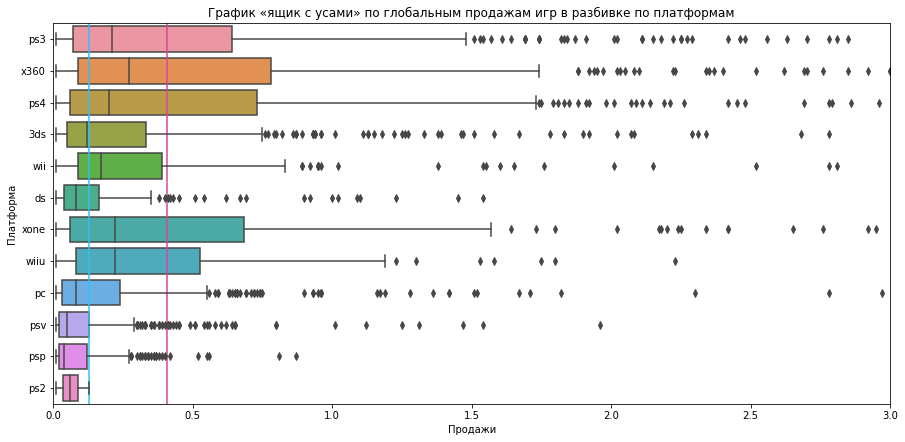

In [47]:
plt.subplots(figsize=(15, 7))
plt.xlim(0, 3)
plt.axvline(good_data['total_sales'].median(),linestyle = '-', color = '#2EC0F9', label = 'median')
plt.axvline(good_data['total_sales'].quantile(0.75),linestyle = '-', color = '#D84797', label = 'quantile0.75')
sns.boxplot(y="platform", x="total_sales", data=good_data, orient="h")
plt.ylabel('Платформа')
plt.xlabel('Продажи')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

In [28]:
good_data.groupby('platform')['total_sales'].describe().append(data['total_sales'].describe())

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,512.0,0.503535,1.441271,0.01,0.0500,0.12,0.3325,14.60
ds,184.0,0.210489,0.636579,0.01,0.0375,0.08,0.1625,8.06
pc,389.0,0.251105,0.505710,0.01,0.0300,0.08,0.2400,5.14
ps2,7.0,0.064286,0.042762,0.01,0.0350,0.06,0.0900,0.13
ps3,708.0,0.629336,1.451388,0.01,0.0700,0.21,0.6400,21.05
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
psp,312.0,0.092981,0.116731,0.01,0.0200,0.04,0.1200,0.87
psv,429.0,0.125431,0.212341,0.01,0.0200,0.05,0.1300,1.96
wii,197.0,0.482335,1.059069,0.01,0.0900,0.17,0.3900,10.12


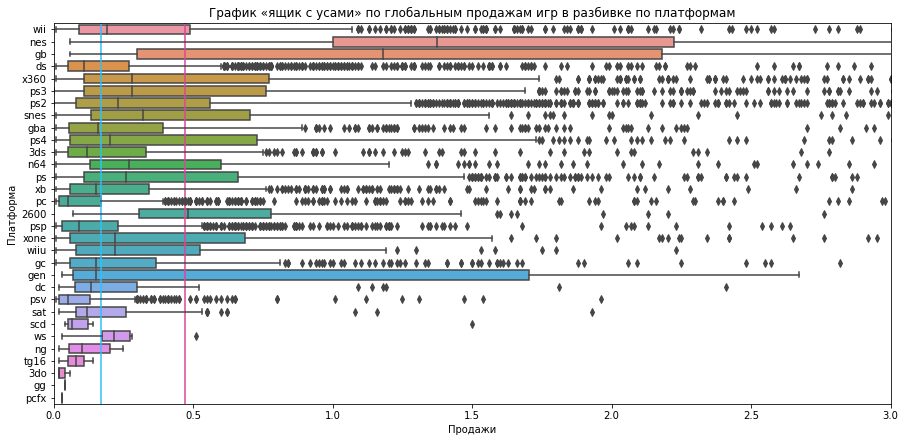

In [48]:
plt.subplots(figsize=(15, 7))
plt.xlim(0, 3)
plt.axvline(data['total_sales'].median(),linestyle = '-', color = '#2EC0F9', label = 'median')
plt.axvline(data['total_sales'].quantile(0.75),linestyle = '-', color = '#D84797', label = 'quantile0.75')
sns.boxplot(y="platform", x="total_sales", data=data, orient="h")
plt.ylabel('Платформа')
plt.xlabel('Продажи')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

**Вывод**

За исследуемый период на платформах средние продажи игр были больше средних мировых продаж (0.17) - ps3 (0.21), x360 (0.27),  xone (0.22), ps4 (0.20), wiiu (0.22).

Заметим, что наибольший размах цены у ps4, затем xone и wiiu. Среднее больше медианного значения, что говорит о скосе выборки вправо.

Что касается платформ за весь период:
- наибольшие медианные продажи у nes и gb
- есть ряд платформ с минимальными продажами: pcfx, gg, tg16, scd, psv
- на всех платформах есть игры, цены на которые отличаются от нормальных значений

#### 5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
<a id="step35"></a>

- Построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами

Рассмотрим платформу ps4:

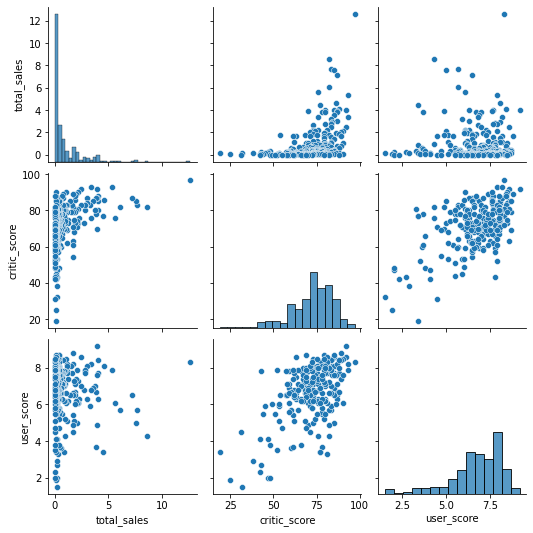

In [30]:
sns.pairplot(data[data['platform'] == "ps4"][data['critic_score']!=-1][data['user_score']!=-1][['total_sales', 'critic_score', 'user_score']])

<AxesSubplot:>

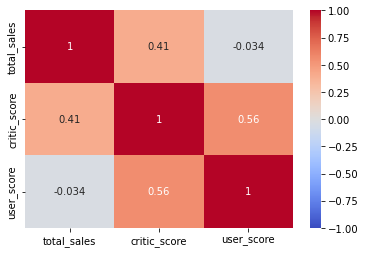

In [31]:
corr = data[data['platform'] == "ps4"][data['critic_score']!=-1][data['user_score']!=-1][['total_sales', 'critic_score', 'user_score']].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, vmin=-1, vmax=1)

**Вывод**

Для платформы ps4 прибыль слабо зависит от оценки критиков (коэффициент корелляции равен 0,41), оценки пользователей не влияют на прибыль. Отметим, что на оценку пользователей влияет оценка критиков (коэф. корелляции равен 0,56).

Наблюдается зависимость оценки пользователей от оценки экспертов на всех платформах, тенденция зависимости продаж от оценок пользователей/экспертов присутствует у платформы wiiu и 3ds - консолей, принадлежащих компании Nintendo. Nintendo of Europe GmbH состоит в ISFE — Европейской федерации интерактивного программного обеспечения. Это означает, что все игры, которые издает Nintendo, проходят добровольную оценку и получают рейтинг в европейской рейтинговой системе компьютерных игр PEGI (Pan European Games Information). (сайт https://www.nintendo.ru/)

На платформах xone и ps4 нет зависимости продаж от оценки пользователя, а от оценки эксперта зависимость прослеживается. 

Платформа psv характеризуется слабой связью оценки эксперта и продаж, связи между оценкой пользователя и продажами нет.

Общий итог: на цену слабо влияет оценка критиков, но оценка критиков слияет на оценку пользователей.

#### 6. Распределение игр по жанрам. 
<a id="step36"></a>

- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

In [32]:
genres = good_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum','count','mean']).sort_values(by=('sum','total_sales'), ascending=False)
genres['part_world_sales'] = round((genres[('sum', 'total_sales')]/genres[('sum', 'total_sales')].sum())*100, 2)
genres['part_world_game'] = round((genres[('count', 'total_sales')]/genres[('count', 'total_sales')].sum())*100, 2)

In [33]:
genres.index

Index(['action', 'shooter', 'role-playing', 'sports', 'misc', 'platform',
       'racing', 'fighting', 'simulation', 'adventure', 'strategy', 'puzzle'],
      dtype='object', name='genre')

In [34]:
genres.T

,genre,action,shooter,role-playing,sports,misc,platform,racing,fighting,simulation,adventure,strategy,puzzle
sum,total_sales,557.800000,402.91000,245.630000,237.15000,139.420000,88.680000,88.310000,66.900000,50.260000,45.040000,22.160000,9.850000
count,total_sales,1269.000000,329.00000,465.000000,389.00000,375.000000,122.000000,180.000000,159.000000,136.000000,410.000000,117.000000,71.000000
mean,total_sales,0.439559,1.22465,0.528237,0.60964,0.371787,0.726885,0.490611,0.420755,0.369559,0.109854,0.189402,0.138732
part_world_sales,,28.540000,20.62000,12.570000,12.14000,7.130000,4.540000,4.520000,3.420000,2.570000,2.300000,1.130000,0.500000
part_world_game,,31.550000,8.18000,11.560000,9.67000,9.320000,3.030000,4.480000,3.950000,3.380000,10.190000,2.910000,1.770000


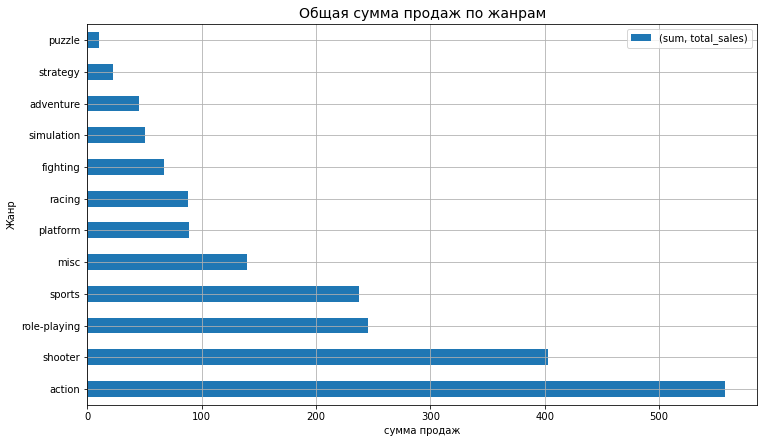

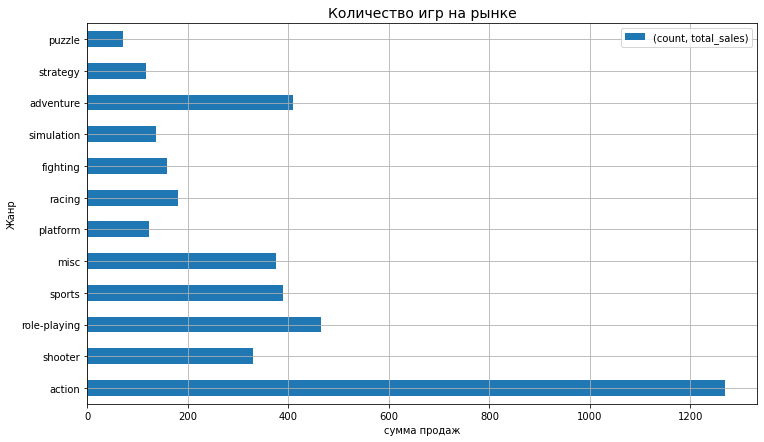

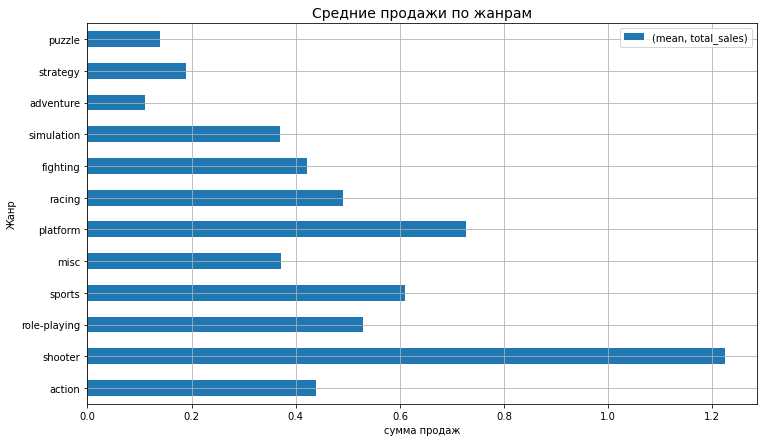

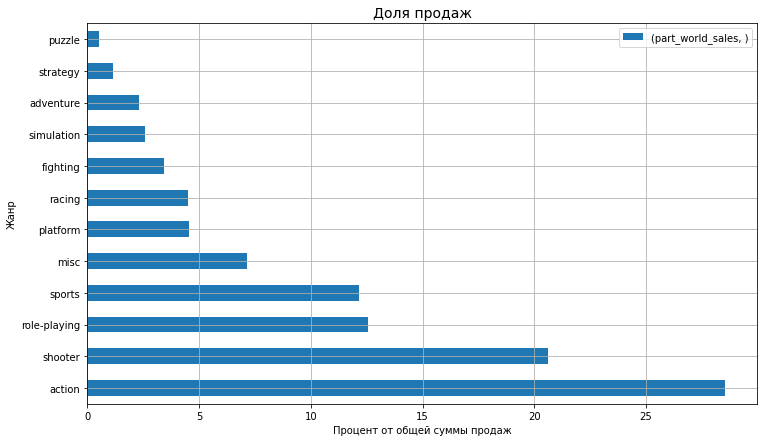

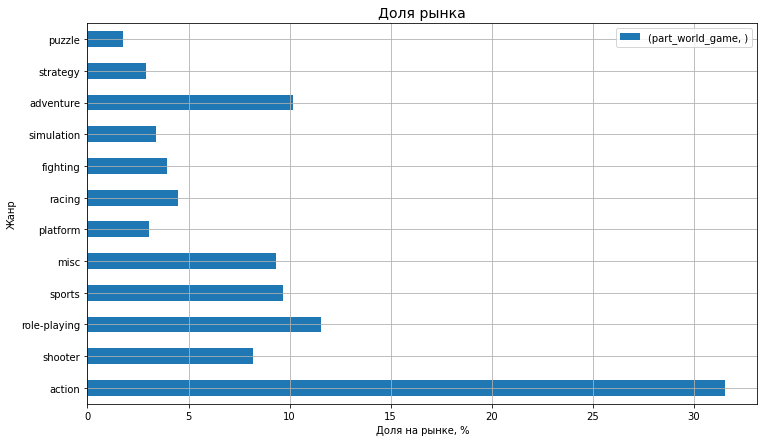

In [35]:
for index in genres.T.index:
    genres.T.loc[index].plot(figsize=(12, 7), kind = 'barh', grid = True)
    plt.xlabel('сумма продаж')
    plt.ylabel('Жанр')
    plt.legend()
    if index == ('sum', 'total_sales'):
        plt.title('Общая сумма продаж по жанрам' , fontsize=14)
    elif index == ('mean', 'total_sales'):
        plt.title('Средние продажи по жанрам' , fontsize=14)
    elif index == ('sum', 'total_sales'):
        plt.title('grsdtgs' , fontsize=14)
    elif index == ('part_world_sales',            ''):
        plt.title('Доля продаж' , fontsize=14)
        plt.xlabel('Процент от общей суммы продаж')
    elif index == ( 'part_world_game',            ''):
        plt.title('Доля рынка' , fontsize=14)
        plt.xlabel('Доля на рынке, %')
    else: plt.title('Количество игр на рынке' , fontsize=14)
    plt.show()

In [36]:
data['total_sales'].describe().T[1] # средняя стоимость игры любого жанра по миру

0.5360234736074495

In [37]:
genres.sort_values(by=('sum', 'total_sales'), ascending=False).head(10)

,sum,count,mean,part_world_sales,part_world_game
,total_sales,total_sales,total_sales,,
genre,,,,,
action,557.80,1269,0.439559,28.54,31.55
shooter,402.91,329,1.224650,20.62,8.18
role-playing,245.63,465,0.528237,12.57,11.56
sports,237.15,389,0.609640,12.14,9.67
misc,139.42,375,0.371787,7.13,9.32
platform,88.68,122,0.726885,4.54,3.03
racing,88.31,180,0.490611,4.52,4.48
fighting,66.90,159,0.420755,3.42,3.95


In [38]:
genres['part_world_sales'].corr(genres['part_world_game'])

0.8429914394408529

**Вывод**

Топ-5 жанров по продажам:
1. action - 557.80 - доля на рынке (количество игр): 31.55 %
2. shooter - 402.91 - доля на рынке (количество игр): 8.18 %
3. role-playing - 245.63 - доля на рынке (количество игр): 11.56 %
4. sports - 237.15 - доля на рынке (количество игр): 9.67 %
5. misc - 139.42 - доля на рынке (количество игр): 9.32 %

Больше всего покупают и выпускают игры в жанре action в связи с большой долей на рынке и сравнительно низкой средней стоимости игры относительно мира (0.44 vs 0.54). На втором месте по продажам жанр shooter, причем по выпуску этот жанр занимает  место (из-за высокой средней стоимости).

Связь между долей рынка и объемом продаж сильная - коэффициент Пирсона равен 0.84 - чем больше выпускают игр, тем больше продаж.

# 4. Портрет пользователя каждого региона 
<a id="step4"></a>

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

na_sales


,sum,count,market_share_platform__sales,market_share_platform__games
,na_sales,na_sales,,
platform,,,,
x360,226.80,498,27.33,12.38
ps3,168.26,708,20.28,17.60
ps4,108.74,392,13.10,9.75
xone,93.12,247,11.22,6.14
3ds,82.65,512,9.96,12.73
wii,48.56,197,5.85,4.90
wiiu,38.10,147,4.59,3.65
pc,29.88,389,3.60,9.67


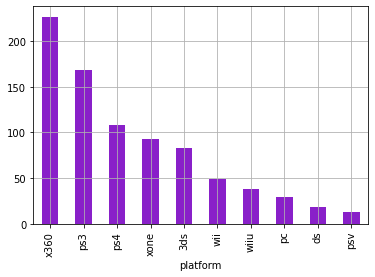

,sum,count,market_share_genre_sales,market_share_genre_games
,na_sales,na_sales,,
genre,,,,
action,230.92,1269,28.2,33.10
shooter,194.43,329,23.7,8.58
sports,108.70,389,13.3,10.15
role-playing,83.78,465,10.2,12.13
misc,69.69,375,8.5,9.78
platform,38.28,122,4.7,3.18
racing,31.98,180,3.9,4.69
fighting,31.63,159,3.9,4.15


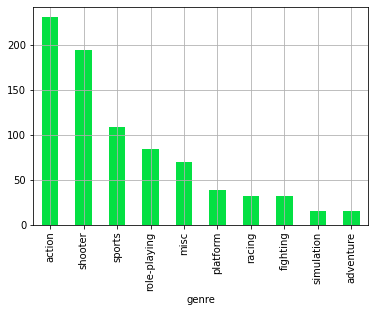

,sum,count,market_share_rating__sales,market_share_rating__games
,na_sales,na_sales,,
rating,,,,
M,308.45,622,37.17,15.46
E,170.17,618,20.51,15.37
-1,123.69,1708,14.91,42.47
E10+,117.72,456,14.19,11.34
T,109.31,616,13.17,15.32
EC,0.42,1,0.05,0.02
RP,0.00,1,0.00,0.02


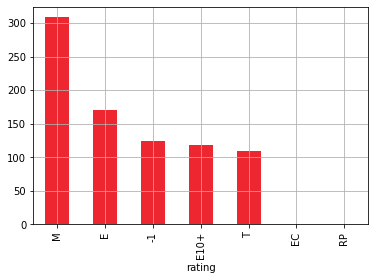

eu_sales


,sum,count,market_share_platform__sales,market_share_platform__games
,eu_sales,eu_sales,,
platform,,,,
ps3,163.10,708,24.35,17.60
ps4,141.09,392,21.06,9.75
x360,117.10,498,17.48,12.38
3ds,61.27,512,9.15,12.73
pc,56.70,389,8.47,9.67
xone,51.59,247,7.70,6.14
wii,29.60,197,4.42,4.90
wiiu,25.13,147,3.75,3.65


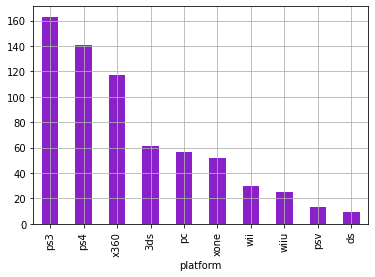

,sum,count,market_share_genre_sales,market_share_genre_games
,eu_sales,eu_sales,,
genre,,,,
action,199.12,1269,30.3,33.10
shooter,148.02,329,22.5,8.58
sports,88.48,389,13.4,10.15
role-playing,62.30,465,9.5,12.13
racing,40.58,180,6.2,4.69
misc,39.72,375,6.0,9.78
platform,30.07,122,4.6,3.18
simulation,19.72,136,3.0,3.55


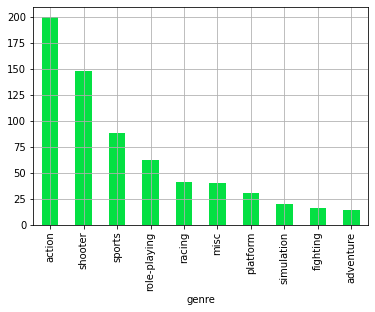

,sum,count,market_share_rating__sales,market_share_rating__games
,eu_sales,eu_sales,,
rating,,,,
M,250.26,622,37.36,15.46
E,141.73,618,21.16,15.37
-1,116.61,1708,17.41,42.47
T,83.16,616,12.42,15.32
E10+,78.00,456,11.65,11.34
RP,0.03,1,0.00,0.02
EC,0.00,1,0.00,0.02


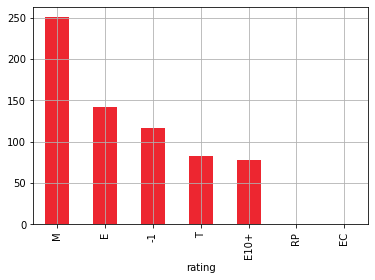

jp_sales


,sum,count,market_share_platform__sales,market_share_platform__games
,jp_sales,jp_sales,,
platform,,,,
3ds,100.62,512,40.96,12.73
ps3,49.39,708,20.11,17.60
psp,24.04,312,9.79,7.76
psv,21.84,429,8.89,10.67
ps4,15.96,392,6.50,9.75
wiiu,13.01,147,5.30,3.65
wii,8.97,197,3.65,4.90
ds,8.04,184,3.27,4.57


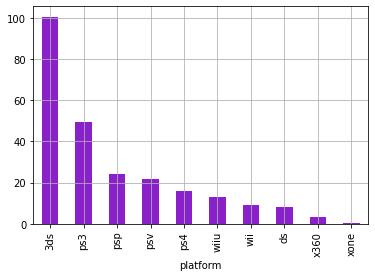

,sum,count,market_share_genre_sales,market_share_genre_games
,jp_sales,jp_sales,,
genre,,,,
role-playing,79.87,465,33.6,12.13
action,63.62,1269,26.7,33.10
misc,17.60,375,7.4,9.78
fighting,12.38,159,5.2,4.15
platform,12.13,122,5.1,3.18
adventure,12.07,410,5.1,10.69
shooter,11.92,329,5.0,8.58
simulation,11.64,136,4.9,3.55


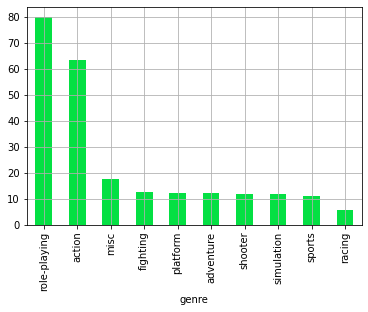

,sum,count,market_share_rating__sales,market_share_rating__games
,jp_sales,jp_sales,,
rating,,,,
-1,138.21,1708,56.26,42.47
E,36.68,618,14.93,15.37
T,33.39,616,13.59,15.32
M,26.14,622,10.64,15.46
E10+,11.23,456,4.57,11.34
EC,0.00,1,0.00,0.02
RP,0.00,1,0.00,0.02


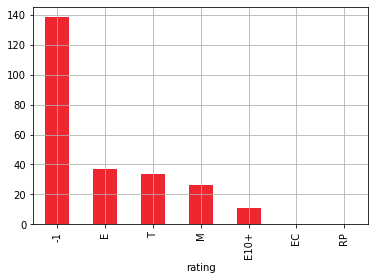

In [39]:
for region in ['na', 'eu', 'jp']:
    reg = region+'_sales'
    print(reg)
    reg_platform_data = good_data.pivot_table(index='platform', values=reg, aggfunc=['sum', 'count']).sort_values(by=('sum',reg), ascending=False)
    reg_platform_data['market_share_platform__sales'] = round((reg_platform_data['sum', reg]/reg_platform_data['sum', reg].sum())*100, 2)
    reg_platform_data['market_share_platform__games'] = round((reg_platform_data['count', reg]/reg_platform_data['count', reg].sum())*100, 2)
    display(reg_platform_data.head(10))
    reg_platform_data.head(10).plot(y=('sum', reg), grid=True, kind='bar', legend=False, color='#8920C9')
    plt.show()
    
    reg_genre_data = good_data.pivot_table(index='genre', values=reg, aggfunc=['sum', 'count']).sort_values(by=('sum',reg), ascending=False).head(10)
    reg_genre_data['market_share_genre_sales'] = round((reg_genre_data['sum', reg]/reg_genre_data['sum', reg].sum())*100, 1)
    reg_genre_data['market_share_genre_games'] = round((reg_genre_data['count', reg]/reg_genre_data['count', reg].sum())*100, 2)
    display(reg_genre_data.head(10))
    reg_genre_data.head(10).plot(y=('sum', reg), grid=True, kind='bar', legend=False, color='#04E043')

    plt.show()
    
    reg_rating_data = good_data.pivot_table(index='rating', values=reg, aggfunc=['sum', 'count']).sort_values(by=('sum',reg), ascending=False)
    reg_rating_data['market_share_rating__sales'] = round((reg_rating_data['sum', reg]/reg_rating_data['sum', reg].sum())*100, 2)
    reg_rating_data['market_share_rating__games'] = round((reg_rating_data['count', reg]/reg_rating_data['count', reg].sum())*100, 2)
    display(reg_rating_data.head(10))
    reg_rating_data.head(10).plot(y=('sum', reg), grid=True, kind='bar', legend=False, color='#ED2630')
    plt.show()
    

**Вывод**

Для рынка Северной Америки характерно:
1. Топ-5 платформ:
    - **x360 **
    - ps3
    - ps4
    - xone
    - 3ds 
2. Топ-5 жанров:
    - **action**
    - shooter
    - sports 
    - role-playing  
    - misc
    
3. Топ возрастного рейтинга

    - M
    - E 
    - -1 - 42% от общего количества игр, проданных в регионе, на которые пришлось 14,47% от общей выручки с региона
    - E10+ 
    - T 
    
Для европейского рынка характерно:
1. Топ-5 платформ:
    - **ps3**
    - ps4
    - x360
    - 3ds 
    - pc
    	
2. Топ-5 жанров:
    - **action**
    - shooter
    - sports 
    - role-playing  
    - racing
	
3. Топ возрастного рейтинга
    - M
    - E
    - -1 - 42% от общего количества игр, проданных в регионе, на которые пришлось 17,41% от общей выручки с региона
    - T
    - E10+
    
Для японского рынка характерно:
1. Топ-5 платформ (в скобках - доля рынка):
    - **3ds**
    - ps3
    - psp
    - psv
    - ps4 
 	
2. Топ-5 жанров (в скобках - доля рынка):
    - **role-playing**
    - action 
    - misc 
    - fighting
    - platform 

3. Топ-5 возрастного рейтинга
    - -1 - 42% от общего количества игр, проданных в регионе, на которые пришлось 56,26% от общей выручки с региона
    - E 
    - T 
    - M 
    - E10+ 
    
   В Японии своя система - Computer Entertainment Rating Organization (CERO), думаю, причина отсутствия данных о рейтинге в этом
    
В Северной Америке самая популярная платформа - x360, в Европе - ps3, в Японии - 3ds. Возможно это связано с влиянием компании на рынке и местоположением: особенно оно выражено на японском рынке: в топах платформ Nintendo и Sony - две конкурирующие фирмы, на американском рынке явное противостояние Sony и Microsoft.Отметим, что сам по себе японский рынок характеризуется меньшим объемом продаж. 

В Северной Америке и Европе любимые жанры почти совпадают, однако в Японии на первое место выходит role-playing.

**Заметим, что 42% от всех игр в каждом регионе не попали под рейтинг**, причем в Японии игры с эти рейтингом занимают 56% от общих продаж - возрастными рейтингами для консольных игр в Японии занимается **CERO**, а не ESRB. ЕSRB была образована в 1994 году, поэтому игры, вывпущенные до 1994 года не учитывались в рейтинговой системе; но так как исследуемый период 2011-2016 год, отсутствие рейтинга ESRB на европейском и американском рынке может говорить о том, что **другие организации занимались присвоением возрастного рейтинга**. Например, PEGI как и в случае с ESRB, не является юридически обязательной для выпуска игры, но без присвоенного рейтинга большинство крупных магазинов просто откажутся её продавать.

Исключая из рассмотрения рейтинг -1: в Америке и Европе популярны игры с ограничением 17 лет, в Японии - игры с рейтингом E - от 6 лет: цель компаний, производящих игры привлечь новых пользователей (тк объемы продаж невелики в сравнении с другими регионами).

Портрет пользователя каждого региона:
1. Американский игрок: больше 17 лет, играет на x360/ps3 в экшн-игры или стрелялки.
2. Европейский игрок: больше 17 лет, играет на ps3/ps4 в экшн-игры или стрелялки.
3. Японский игрок: больше 6 лет, играет на портативных консолях 3ds/psp или ps3 в рпг игры или экшены.

Возможно, такое различие портретов пользователей связано с разной культурой стран. 

# 5. Проверка гипотез

<a id="step5"></a>

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<a id="step51"></a>

**H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные;

Уровень значимости: 1%

Для проверки гипотезы будем использовать ttest Стьдента о равенстве средних двух генеральных совокупностей. 

In [40]:
xone = data.query('platform == "xone"')['user_score'].dropna()
pc = data.query('platform == "pc"')['user_score'].dropna()
alpha = .01
print(st.levene(xone, pc, center='median').pvalue)

if st.levene(xone, pc, center='median').pvalue > alpha:
    print('Дисперсии равны, equal_var = True')
else: print('Дисперсии не равны, equal_var = False')

0.43083613698283985
Дисперсии равны, equal_var = True


In [41]:
results = st.ttest_ind(xone, pc, equal_var=True)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средняя оценка игр пользователями платформы "xone": ', xone.median())
print('Средняя оценка игр пользователями платформы "pc": ', pc.median())

p-значение:  0.00021488621521183055
Отвергаем нулевую гипотезу
Средняя оценка игр пользователями платформы "xone":  6.15
Средняя оценка игр пользователями платформы "pc":  7.1


**Вывод**

Предположение о равенстве средних пользовательских рейтингов на платформах Xbox One и PC **неверно**. 

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен игры) и Sports (англ. «спортивные соревнования») 
<a id="step52"></a>

**H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;**

H1: Средние пользовательские рейтинги жанров Action и Sports разные;

Уровень значимости: 1%

Для проверки гипотезы будем использовать ttest Стьдента о равенстве средних двух генеральных совокупностей. 

In [42]:
action = data.query('genre == "action"')['user_score'].dropna()
sports = data.query('genre == "sports"')['user_score'].dropna()

alpha = .01
print(st.levene(xone, pc, center='median').pvalue)

if st.levene(xone, pc, center='median').pvalue > alpha:
    print('Дисперсии равны, equal_var = True')
else: print('Дисперсии не равны, equal_var = False')

0.43083613698283985
Дисперсии равны, equal_var = True


In [43]:
results = st.ttest_ind(action, sports, equal_var=True)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средняя пользовательская оценка жанра "action": ', action.median())
print('Средняя пользовательская оценка жанра "sports": ', sports.median())

p-значение:  0.0009159161569896015
Отвергаем нулевую гипотезу
Средняя пользовательская оценка жанра "action":  5.9
Средняя пользовательская оценка жанра "sports":  5.0


**Вывод**

Предположение о равенстве средних пользовательских оценок жанров Action и Sports неверно. 

Средние пользовательские оценки жанров Action и sports разные.

# 6. Выводы
<a id="step6"></a>

Данные по выпущенным по годам играм не важны:
В 1980-х только появились ПК, вплоть до 90х годов был небольшой спрос на компьютеры. В 2000-х стал доступен мобильный широкополостный доступ - произошел рост релиза игр до 2009 года. Далее период 2009-2016 года характеризуется спадом.

Топ продаж игр на разных платформах длится в среднем 3-6 лет, после наблюдается спад. Самая продаваемая платформа - ps2, пик продаж пришелся на 2001-2006 года. На втором месте - x360 (2007-2012), третьем - ps3 (2008-2013). Отметим, что ps4 2014 году, значит пик продаж игр на эту платформу, скорее всего, придется на 2017-2019 года. Конкурирующей площадкой станут площадки того же поколения - выпущенные в 2012-2014 годах.

У компании Sony прослеживается смена поколений приставок, которые остаются на высоком уровне по прибыли продаж игр. Можно заметить, что с каждым новым поколением приставок продажи игр повышаются.

Наиболее распространенными методами экстраполяции трендов являются метод скользящего среднего: следующий во времени показатель по своей величине равен средней, рассчитанной за три периода. Актуальный период для расчета прогноза на 2017 год можно считать 2014-2016 года, но стоит также учесть разные поколения платформ, поэтому за анализируемый период возьмем данные за 2011-2016 года (8 поколение приставок).

Рост продаж 2013-2015 наблюдается у приставок ps4, xone. Думаю, продажи на данных платформах еще не достигли своего пика. Снижение продаж в 2011-2016 характерно для 3ds, ps3, x360, wii, ds, pc, psp, ps2; 

psv характеризовался ростом продаж в 2011-2012, затем - спад; wiiu также сначала характеризовался ростом продаж, затем (с 2015) - спадом.

За исследуемый период на платформах средние продажи игр были больше средних мировых продаж (0.17) - ps3 (0.21), x360 (0.27),  xone (0.22), ps4 (0.20), wiiu (0.22).

Заметим, что наибольший размах цены у ps4, затем xone и wiiu. Среднее больше медианного значения, что говорит о скосе выборки вправо.

Что касается платформ за весь период:
- наибольшие медианные продажи у nes и gb
- есть ряд платформ с минимальными продажами: pcfx, gg, tg16, scd, psv
- на всех платформах есть игры, цены на которые отличаются от нормальных значений

Для платформы ps4 прибыль слабо зависит от оценки критиков (коэффициент корелляции равен 0,41), оценки пользователей не влияют на прибыль. Отметим, что на оценку пользователей влияет оценка критиков (коэф. корелляции равен 0,56).

Наблюдается зависимость оценки пользователей от оценки экспертов на всех платформах, тенденция зависимости продаж от оценок пользователей/экспертов присутствует у платформы wiiu и 3ds - консолей, принадлежащих компании Nintendo. Nintendo of Europe GmbH состоит в ISFE — Европейской федерации интерактивного программного обеспечения. Это означает, что все игры, которые издает Nintendo, проходят добровольную оценку и получают рейтинг в европейской рейтинговой системе компьютерных игр PEGI (Pan European Games Information). (сайт https://www.nintendo.ru/)

На платформах xone и ps4 нет зависимости продаж от оценки пользователя, а от оценки эксперта зависимость прослеживается. 

Платформа psv характеризуется слабой связью оценки эксперта и продаж, связи между оценкой пользователя и продажами нет.

Общий итог: на цену слабо влияет оценка критиков, но оценка критиков слияет на оценку пользователей.


**Топ-5 жанров по продажам:**
1. action - 557.80 - доля на рынке (количество игр): 31.55 %
2. shooter - 402.91 - доля на рынке (количество игр): 8.18 %
3. role-playing - 245.63 - доля на рынке (количество игр): 11.56 %
4. sports - 237.15 - доля на рынке (количество игр): 9.67 %
5. misc - 139.42 - доля на рынке (количество игр): 9.32 %

Больше всего покупают и выпускают игры в жанре action в связи с большой долей на рынке и сравнительно низкой средней стоимости игры относительно мира (0.44 vs 0.54). На втором месте по продажам жанр shooter, причем по выпуску этот жанр занимает  место (из-за высокой средней стоимости).

Связь между долей рынка и объемом продаж сильная - коэффициент Пирсона равен 0.84 - чем больше выпускают игр, тем больше продаж.

В Северной Америке самая популярная платформа - x360, в Европе - ps3, в Японии - 3ds. Возможно это связано с влиянием компании на рынке и местоположением: особенно оно выражено на японском рынке: в топах платформ Nintendo и Sony - две конкурирующие фирмы, на американском рынке явное противостояние Sony и Microsoft.Отметим, что сам по себе японский рынок характеризуется меньшим объемом продаж. 

В Северной Америке и Европе любимые жанры почти совпадают, однако в Японии на первое место выходит role-playing.

Заметим, что **42% от всех игр в каждом регионе не попали под рейтинг**, причем в Японии игры с эти рейтингом занимают 56% от общих продаж - **возрастными рейтингами для консольных игр в Японии занимается CERO**, а не ESRB. ЕSRB была образована в 1994 году, поэтому игры, вывпущенные до 1994 года не учитывались в рейтинговой системе; но так как исследуемый период 2011-2016 год, отсутствие рейтинга ESRB на европейском и американском рынке может говорить о том, что **другие организации занимались присвоением возрастного рейтинга.** Например, PEGI как и в случае с ESRB, не является юридически обязательной для выпуска игры, но без присвоенного рейтинга большинство крупных магазинов просто откажутся её продавать.

Исключая из рассмотрения рейтинг -1: в Америке и Европе популярны игры с ограничением 17 лет, в Японии - игры с рейтингом E - от 6 лет: цель компаний, производящих игры привлечь новых пользователей (тк объемы продаж невелики в сравнении с другими регионами).

При создании **рекламной кампании** следует учитывать типовую целевую аудиторию для разных регионов:


**Портрет пользователя каждого региона:**
1. Американский игрок: больше 17 лет, играет на x360/ps3 в экшн-игры или стрелялки.
2. Европейский игрок: больше 17 лет, играет на ps3/ps4 в экшн-игры или стрелялки.
3. Японский игрок: больше 6 лет, играет на портативных консолях 3ds/psp или ps3 в рпг игры или экшены.

Возможно, такое различие портретов пользователей связано с разной культурой стран. 

Отметим, что в 2017 году игры на платформах x360/ps3/3ds необходимо рекламировать исходя из стратегии развития товара: увеличивать ассортимент продукта / сменить имидж игры / сделать сиквел или выходить на рынок с новым товаром ИЛИ расширять ассортимент игр. 

Для платформ нового поколения (которые еще находятся на стадии роста) следует придерживаться стратегии развития рынка: выпускать старые игры на новых платформах (?), искать новые группы потребителей. На мой взгляд, наиболее потенциально прибыльной возрастной группой станет категория E на всех рынках. Также для этих платформ важна диверсификация игр: следует инвестировать и в новые игры наиболее выигрышных категорий для каждого региона. 

Предположение о равенстве средних пользовательских рейтингов на платформах Xbox One и PC неверно.

Предположение о разных средних пользовательских оценок жанров Action верно.

[К содержанию](#cont)
<a id="step1"></a>